# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lon": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | almyros
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | saratamata
City not found. Skipping...
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | sake
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | fort mcmurray
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | petropavlovsk-kamchatsky
Processing Record 11 of Set 1 | badger
Processing Record 12 of Set 1 | mhamid
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | gadzhiyevo
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | remire-montjoly
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 

In [47]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lon           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [48]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,almyros,39.1822,22.7594,301.10,47,75,3.09,GR,1720031101
1,port-aux-francais,-49.3500,70.2167,273.42,63,98,2.50,TF,1720031102
2,puerto natales,-51.7236,-72.4875,275.40,75,100,2.06,CL,1720031104
3,san patricio,28.0170,-97.5169,307.68,58,53,6.60,US,1720031106
4,sake,-1.5736,29.0450,291.21,77,59,0.32,CD,1720031108


In [61]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [62]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\ormis\Desktop\python-API-challenge\Output\Output.csv", index_label="City_ID")

In [63]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\ormis\Desktop\python-API-challenge\Output\Output.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,almyros,39.1822,22.7594,301.10,47,75,3.09,GR,1720031101
1,port-aux-francais,-49.3500,70.2167,273.42,63,98,2.50,TF,1720031102
2,puerto natales,-51.7236,-72.4875,275.40,75,100,2.06,CL,1720031104
3,san patricio,28.0170,-97.5169,307.68,58,53,6.60,US,1720031106
4,sake,-1.5736,29.0450,291.21,77,59,0.32,CD,1720031108


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

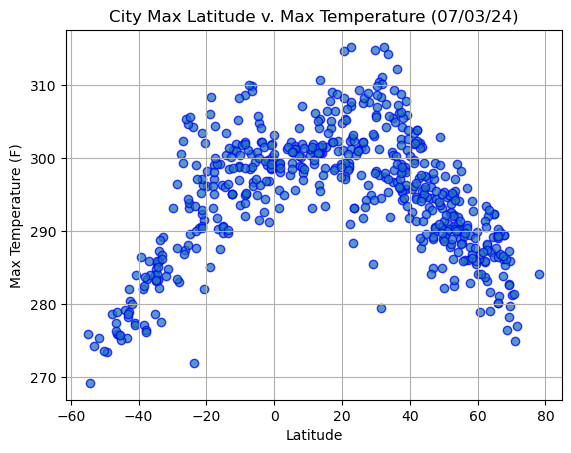

In [64]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps, 
            edgecolors="blue", linewidths=1, marker="o", 
            alpha=.75, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Max Latitude v. Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\ormis\Desktop\python-API-challenge\Resources\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

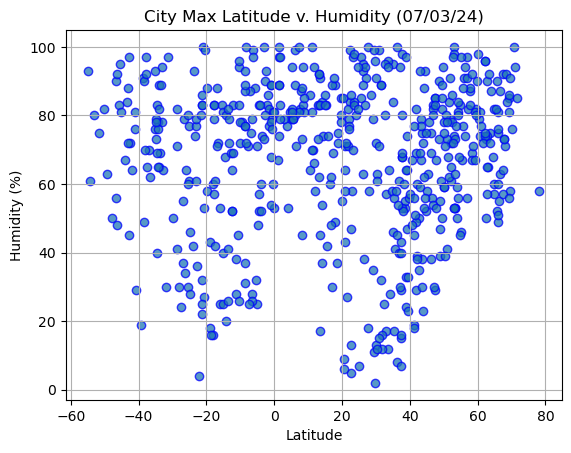

In [65]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, 
            edgecolors="blue", linewidths=1, marker="o", 
            alpha=.75, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Max Latitude v. Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\ormis\Desktop\python-API-challenge\Resources\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

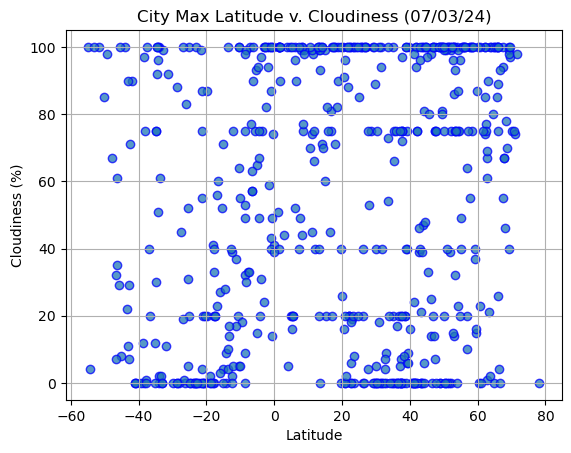

In [66]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness, 
            edgecolors="blue", linewidths=1, marker="o", 
            alpha=.75, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Max Latitude v. Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\ormis\Desktop\python-API-challenge\Resources\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

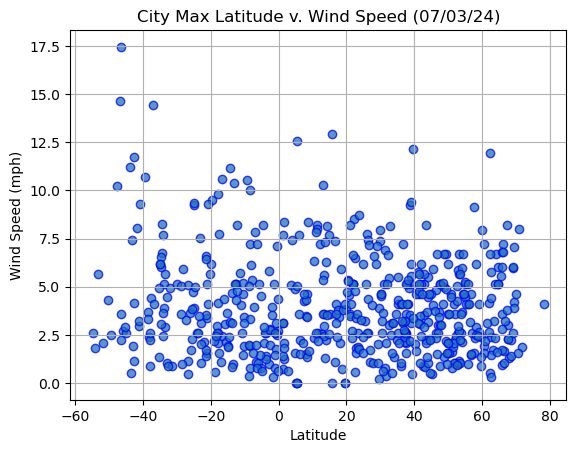

In [67]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed, 
            edgecolors="blue", linewidths=1, marker="o", 
            alpha=.75, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Max Latitude v. Wind Speed ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\ormis\Desktop\python-API-challenge\Resources\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [78]:
# Define a function to create Linear Regression plots
def linearRegression(x_values, y_values, regplotX, regplotY, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values, "r-")
    print(f"The r-square is {rvalue}")
    print(line)
    plt.annotate(line,(regplotX, regplotY), fontsize=12, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(f'{y_label}')
    plt.grid()

In [71]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
North_df = city_data_df.loc[city_data_df["Lat"] > 0]


# Display sample data
North_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,almyros,39.1822,22.7594,301.10,47,75,3.09,GR,1720031101
3,san patricio,28.0170,-97.5169,307.68,58,53,6.60,US,1720031106
6,fort mcmurray,56.7268,-111.3810,295.88,56,20,4.63,CA,1720031110
8,petropavlovsk-kamchatsky,53.0452,158.6483,282.48,100,100,1.00,RU,1720031113
9,badger,64.8000,-147.5333,292.29,60,100,5.14,US,1720031114


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
South_df = city_data_df.loc[city_data_df["Lat"] < 0 ]

# Display sample data
South_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,273.42,63,98,2.50,TF,1720031102
2,puerto natales,-51.7236,-72.4875,275.40,75,100,2.06,CL,1720031104
4,sake,-1.5736,29.0450,291.21,77,59,0.32,CD,1720031108
5,hermanus,-34.4187,19.2345,285.82,78,51,8.25,ZA,1720031109
7,edinburgh of the seven seas,-37.0676,-12.3116,285.93,70,40,14.46,SH,1720031112


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.68298023159045
y = -0.28x + 306.58


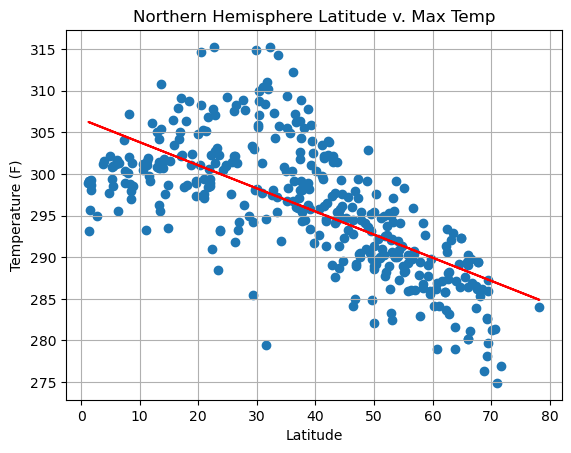

In [81]:
# Linear regression on Northern Hemisphere
x_values = North_df["Lat"]
y_values = North_df["Max Temp"]

regplotX = 0
regplotY = 40

y_label = "Temperature (F)"

plt.title(f"Northern Hemisphere Latitude v. Max Temp")
linearRegression(x_values, y_values, regplotX, regplotY, y_label)

plt.show()

The r-square is 0.8203711378592462
y = 0.53x + 303.67


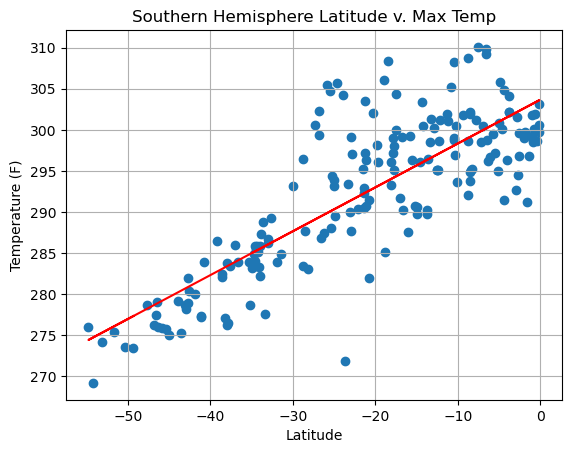

In [80]:
# Linear regression on Southern Hemisphere
x_values = South_df["Lat"]
y_values = South_df["Max Temp"]

regplotX = -25
regplotY = 40

y_label = "Temperature (F)"
plt.title(f"Southern Hemisphere Latitude v. Max Temp")
linearRegression(x_values, y_values, regplotX, regplotY, y_label)

plt.show()

**Discussion about the linear relationship:** There is an inverse relationship between the relationship of latitude and max temperature between the Northern and Souther Hemisphere. The Northern Hemisphere sees a decrease in max temperatures as latitude rises and the Southern Hemisphere sees the alternative with latitude increasing along with the latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.0019984370662269896
y = 0.0x + 67.49


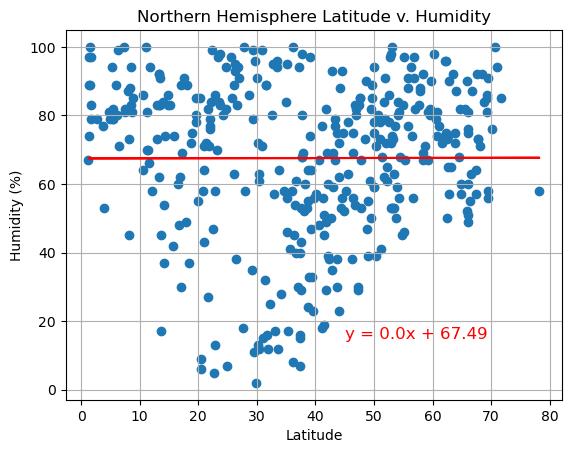

In [82]:
# Northern Hemisphere
x_values = North_df["Lat"]
y_values = North_df["Humidity"]

regplotX = 45
regplotY = 15

y_label = "Humidity (%)"

plt.title(f"Northern Hemisphere Latitude v. Humidity")
linearRegression(x_values, y_values, regplotX, regplotY, y_label)

plt.show()

The r-square is -0.04887739800061197
y = -0.08x + 64.42


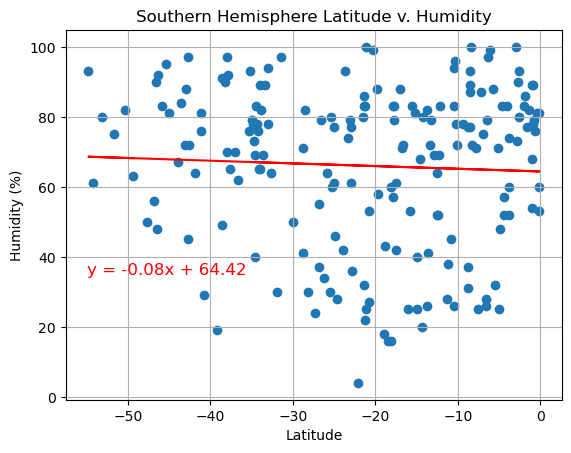

In [89]:
# Southern Hemisphere
x_values = South_df["Lat"]
y_values = South_df["Humidity"]

regplotX = -55
regplotY = 35

y_label = "Humidity (%)"
plt.title(f"Southern Hemisphere Latitude v. Humidity")
linearRegression(x_values, y_values, regplotX, regplotY, y_label)

plt.show()

**Discussion about the linear relationship:** The relationship of humidity with latitude in the Northern and Southern Hemisphere is fairly weak. This could be due to other variables needing to be included when looking for a relationship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.025496470776702983
y = 0.05x + 56.42


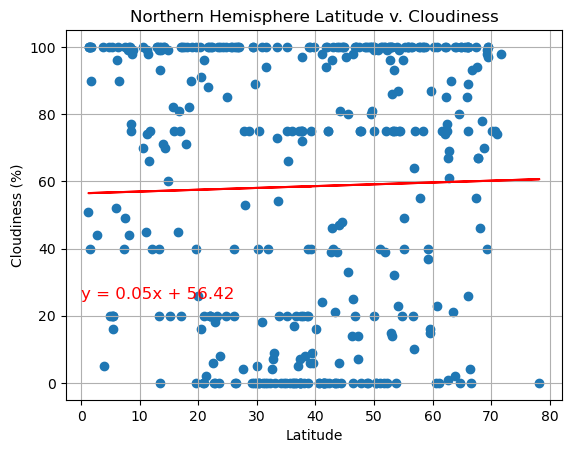

In [84]:
# Northern Hemisphere
x_values = North_df["Lat"]
y_values = North_df["Cloudiness"]

regplotX = 0
regplotY = 25

y_label = "Cloudiness (%)"

plt.title(f"Northern Hemisphere Latitude v. Cloudiness")
linearRegression(x_values, y_values, regplotX, regplotY, y_label)

plt.show()

The r-square is 0.102856787848138
y = 0.27x + 49.64


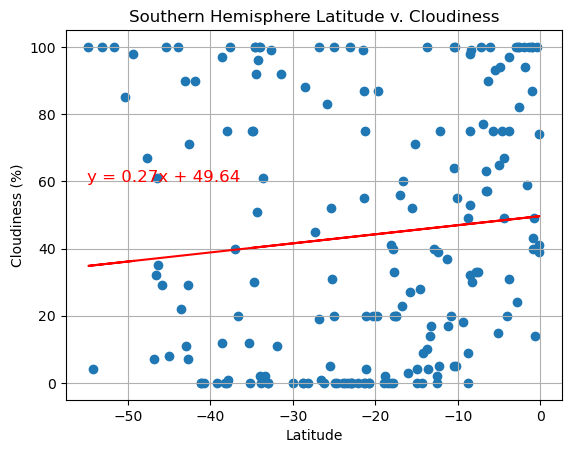

In [90]:
# Southern Hemisphere
x_values = South_df["Lat"]
y_values = South_df["Cloudiness"]

regplotX = -55
regplotY = 60

y_label = "Cloudiness (%)"
plt.title(f"Southern Hemisphere Latitude v. Cloudiness")
linearRegression(x_values, y_values, regplotX, regplotY, y_label)

plt.show()

**Discussion about the linear relationship:** There is a slightly stronger relationship between cloudiness and a lower latitude in the Southern Hemisphere compared to a weak or non-existent relationship between cloudiness and latitude in the Northern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is -0.055224758911297925
y = -0.01x + 4.05


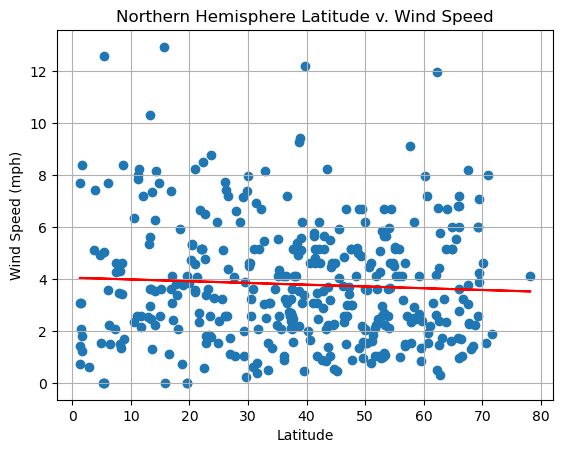

In [87]:
# Northern Hemisphere
x_values = North_df["Lat"]
y_values = North_df["Wind Speed"]

regplotX = 35
regplotY = 25

y_label = "Wind Speed (mph)"

plt.title(f"Northern Hemisphere Latitude v. Wind Speed")
linearRegression(x_values, y_values, regplotX, regplotY, y_label)

plt.show()

The r-square is -0.21320385086838428
y = -0.04x + 3.19


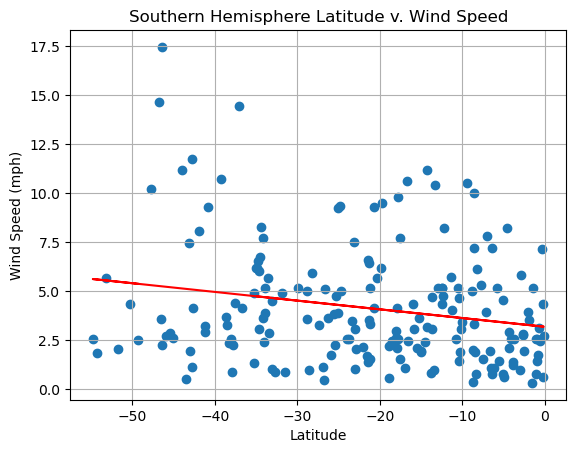

In [88]:
# Southern Hemisphere
x_values = South_df["Lat"]
y_values = South_df["Wind Speed"]

regplotX = -50
regplotY = 25

y_label = "Wind Speed (mph)"
plt.title(f"Southern Hemisphere Latitude v. Wind Speed")
linearRegression(x_values, y_values, regplotX, regplotY, y_label)

plt.show()

**Discussion about the linear relationship:** There is a weak relationship between wind speed and latitude in both hemispheres. The southern hemisphere shows a slightly stronger influence comparatively with a higher latitude having weaker wind speeds. However, neither hemisphere has a strong relationship between these variables. 